In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,explained_variance_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler,scale
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import researchpy as rp
from scipy import stats

In [2]:
mat = pd.read_csv('student-mat.csv')
por = pd.read_csv('student-por.csv')

In [3]:
df = pd.concat([mat,por])

In [4]:
df.info()
stats_df = df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [5]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [6]:
df.describe()

age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     4.000000     3.000000     2.000000     1.000000   
50%       0.000000     4.000000     3.000000     3.000000     1.000000   
75%       0.000000     5.000000     4.000000     4.000000     2.000000   
max       3.000000     5.000000     5.000000     5.000000     5.000000   

              Walc       health     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      2.284483     3.543103     4.434866    11.213602    11.246169   
std       1.285105     1.424703     6.210017     2.983394     3.285071   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     0.000000     9.000000     9.000000   
50%       2.000000     4.000000     2.000000    11.000000    11.000000   
75%       3.000000     5.000000     6.000000    13.000000    13.000000   
max       5.000000     5.000000    75.000000    19.000000    19.000000   

                G3  
count  1044.000000  
mean     11.341954  
std       3.864796  
min       0.000000  
25%      10.000000  
50%      11.000000  
75%      14.000000  
max      20.000000

In [7]:
df = df[df['G3'] != 0]
df = df[df['G2'] != 0]
df = df[df['G1'] != 0]

In [8]:
object_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
              'famsup','paid','activities','nursery','higher','internet','romantic']

In [9]:
# independent t test 
def one_sample_t_test(df,col,p_value=0.05):
    
    values_list = df[col].unique()
    sample_len = 0
    len1 = len(df[df[col] == values_list[0]])
    len2 = len(df[df[col] == values_list[1]])
    if len1 > len2:
        sample_len = len2
    else:
        sample_len = len1
        
    sample1 = df[df[col] == values_list[0]].sample(sample_len)['G3']
    sample2 = df[df[col] == values_list[1]].sample(sample_len)['G3']

    # check the distribution of the residuals between the two groups should follow the normal distribution
    diff = scale(np.array(sample1, dtype=np.float) - np.array(sample2, dtype=np.float))
    plt.hist(diff)

    # generate a probability plot of sample data against the quantiles of a theoretical distribution
    plt.figure(figsize=(10,8))
    stats.probplot(diff,plot=plt,dist='norm')
    plt.show()

    # levene test to check whether the variance between two groups is same
    stats.levene(sample1,sample2)
    if stats.levene(sample1,sample2).pvalue > p_value:
        print('Variance in G3 for {} between two groups ({}, {}) is same in population\n'.format(col,values_list[0],values_list[1]))
    else:
        print('Variance in G3 for {} between two groups ({}, {}) is not same in population\n'.format(col,values_list[0],values_list[1]))

    # normality testing
    if stats.shapiro(diff).pvalue > p_value:
        print('Difference in G3 for {} between two group ({}, {}) is normaly distributed in population\n'.format(col,values_list[0],values_list[1]))
    else:
        print('Difference in G3 for {} between two group ({}, {}) is not normaly distributed in population\n'.format(col,values_list[0],values_list[1]))

    # because two group have same variance we can perform independent t test 
    if stats.levene(sample1,sample2).pvalue > p_value:
        desc,results = rp.ttest(sample1,sample2)
        print(desc)
        print(results)
    else:
        desc,results = rp.ttest(sample1,sample2,equal_variances=False)
        print(desc,end='\n')
        print(results,end='\n')
    if results.iloc[3,1] > p_value:
        print('There is not enough evidence suggested that the average G3 score for {} is different between group {} and {}'.format(col,values_list[0],values_list[1]))
    else:
        print('We can conclude that average G3 score for {} between two group {} and {} is different'.format(col,values_list[0],values_list[1]))
        
    result_df = pd.DataFrame([[stats.levene(sample1,sample2).pvalue,
                             stats.shapiro(diff).pvalue,
                             results.iloc[3,1]]],columns=['Levene test Pvalue','Shapiro test Pvalue','T test Pvalue'])
    return result_df



def create_pvalue_df(col,result):
    test = one_sample_t_test(stats_df,col)
    test.index  = [col]
    result = test.append(test)
    return result

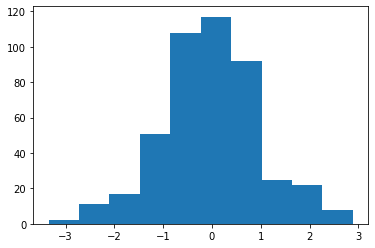

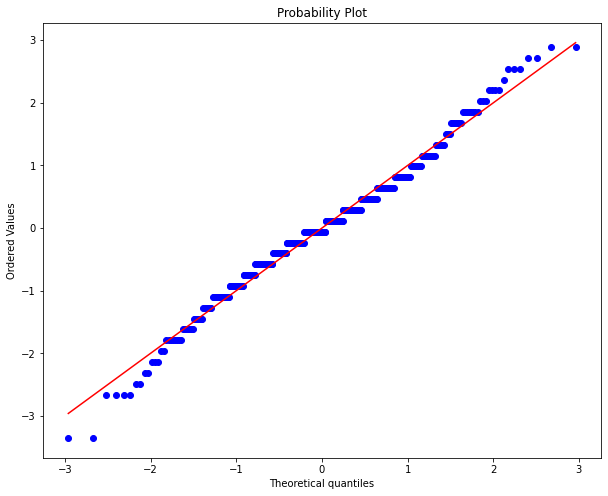

Variance in G3 for sex between two groups (F, M) is same in population

Difference in G3 for sex between two group (F, M) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  453.0  11.532009  3.868064  0.181737  11.174854  11.889164
1        G3  453.0  11.203091  3.852167  0.180991  10.847403  11.558778
2  combined  906.0  11.367550  3.861498  0.128290  11.115770  11.619330
          Independent t-test   results
0    Difference (G3 - G3) =     0.3289
1      Degrees of freedom =   904.0000
2                       t =     1.2824
3   Two side test p value =     0.2000
4  Difference < 0 p value =     0.9000
5  Difference > 0 p value =     0.1000
6               Cohen's d =     0.0852
7               Hedge's g =     0.0851
8           Glass's delta =     0.0850
9             Pearson's r =     0.0426
There is not enough evidence suggested that the average G3 score for sex is different between group F and M


Levene test Pvalue  Shapiro test Pvalue  T test Pvalue
sex            0.728956              0.00034            0.2

In [10]:
col = 'sex'
result = one_sample_t_test(stats_df,col)
result.index = [col]
result.head()

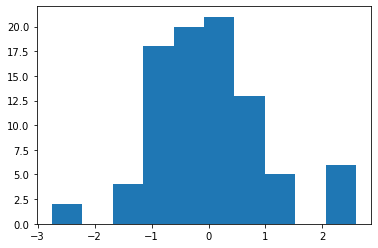

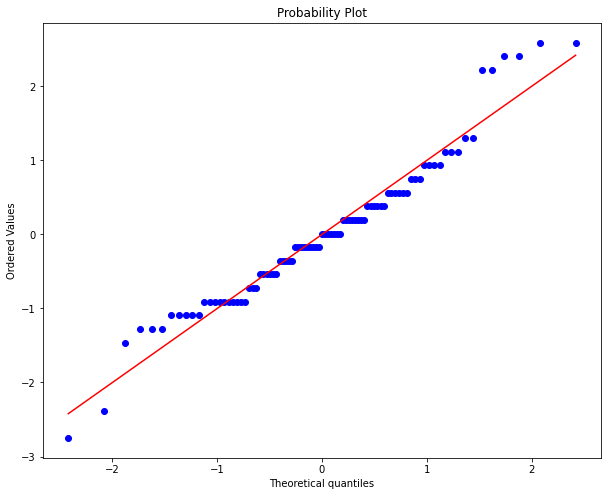

Variance in G3 for higher between two groups (yes, no) is same in population

Difference in G3 for higher between two group (yes, no) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3   89.0  12.280899  3.711128  0.393379  11.499141  13.062657
1        G3   89.0   8.348315  3.545487  0.375821   7.601450   9.095180
2  combined  178.0  10.314607  4.121312  0.308905   9.704995  10.924218
          Independent t-test   results
0    Difference (G3 - G3) =     3.9326
1      Degrees of freedom =   176.0000
2                       t =     7.2284
3   Two side test p value =     0.0000
4  Difference < 0 p value =     1.0000
5  Difference > 0 p value =     0.0000
6               Cohen's d =     1.0836
7               Hedge's g =     1.0790
8           Glass's delta =     1.0597
9             Pearson's r =     0.4784
We can conclude that average G3 score for higher between two group yes and no is different


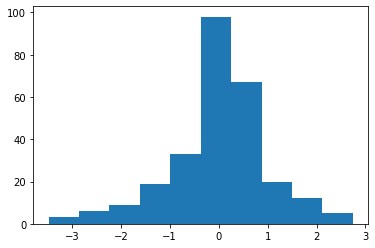

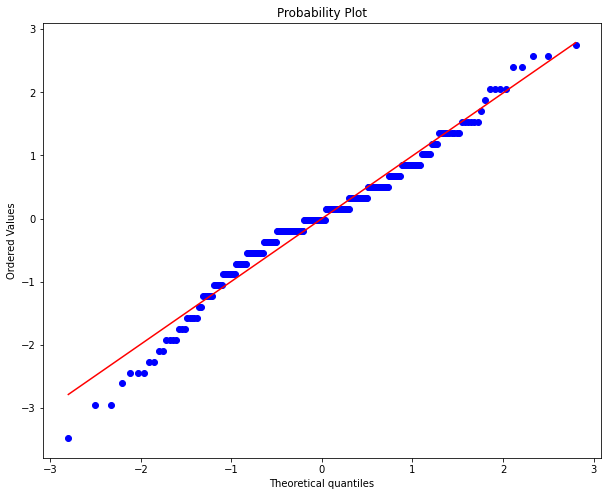

Variance in G3 for school between two groups (GP, MS) is same in population

Difference in G3 for school between two group (GP, MS) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  272.0  11.636029  3.986586  0.241722  11.160137  12.111922
1        G3  272.0  10.514706  3.908521  0.236989  10.048133  10.981279
2  combined  544.0  11.075368  3.983832  0.170805  10.739847  11.410888
          Independent t-test   results
0    Difference (G3 - G3) =     1.1213
1      Degrees of freedom =   542.0000
2                       t =     3.3125
3   Two side test p value =     0.0010
4  Difference < 0 p value =     0.9995
5  Difference > 0 p value =     0.0005
6               Cohen's d =     0.2840
7               Hedge's g =     0.2836
8           Glass's delta =     0.2813
9             Pearson's r =     0.1409
We can conclude that average G3 score for school between two group GP and MS is different


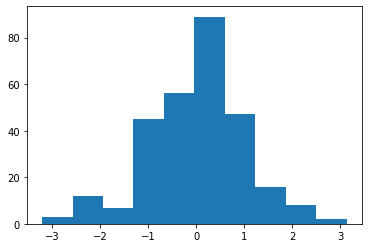

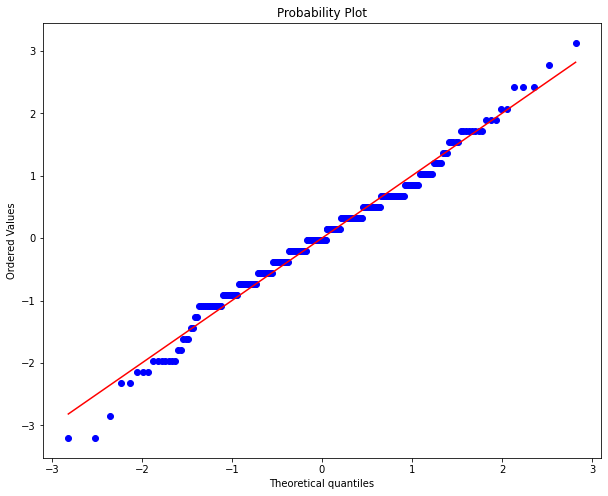

Variance in G3 for address between two groups (U, R) is same in population

Difference in G3 for address between two group (U, R) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  285.0  11.803509  3.939238  0.233340  11.344213  12.262805
1        G3  285.0  10.600000  3.982532  0.235905  10.135656  11.064344
2  combined  570.0  11.201754  4.003030  0.167668  10.872430  11.531079
          Independent t-test   results
0    Difference (G3 - G3) =     1.2035
1      Degrees of freedom =   568.0000
2                       t =     3.6271
3   Two side test p value =     0.0003
4  Difference < 0 p value =     0.9998
5  Difference > 0 p value =     0.0002
6               Cohen's d =     0.3038
7               Hedge's g =     0.3034
8           Glass's delta =     0.3055
9             Pearson's r =     0.1505
We can conclude that average G3 score for address between two group U and R is different


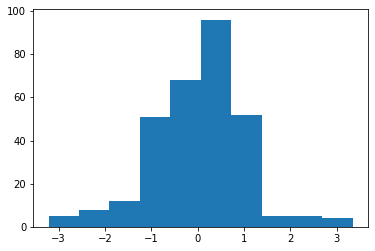

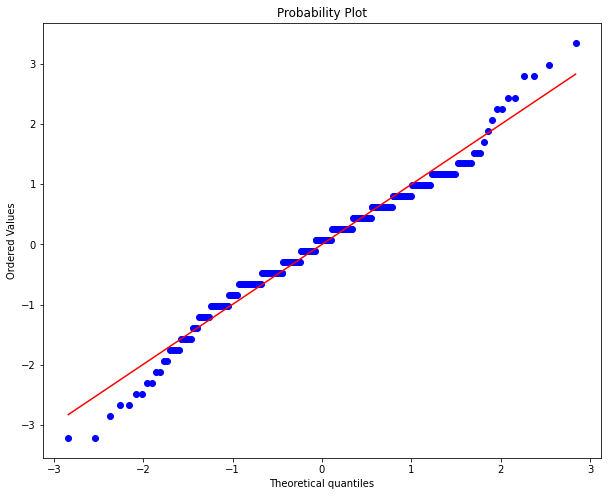

Variance in G3 for famsize between two groups (GT3, LE3) is same in population

Difference in G3 for famsize between two group (GT3, LE3) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  306.0  11.343137  3.992193  0.228219  10.894055  11.792219
1        G3  306.0  11.709150  3.500405  0.200105  11.315390  12.102911
2  combined  612.0  11.526144  3.755755  0.151817  11.227997  11.824291
          Independent t-test   results
0    Difference (G3 - G3) =    -0.3660
1      Degrees of freedom =   610.0000
2                       t =    -1.2059
3   Two side test p value =     0.2283
4  Difference < 0 p value =     0.1142
5  Difference > 0 p value =     0.8858
6               Cohen's d =    -0.0975
7               Hedge's g =    -0.0974
8           Glass's delta =    -0.0917
9             Pearson's r =     0.0488
There is not enough evidence suggested that the average G3 score for famsize is different between group

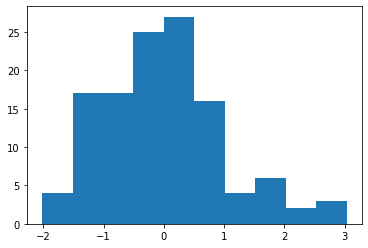

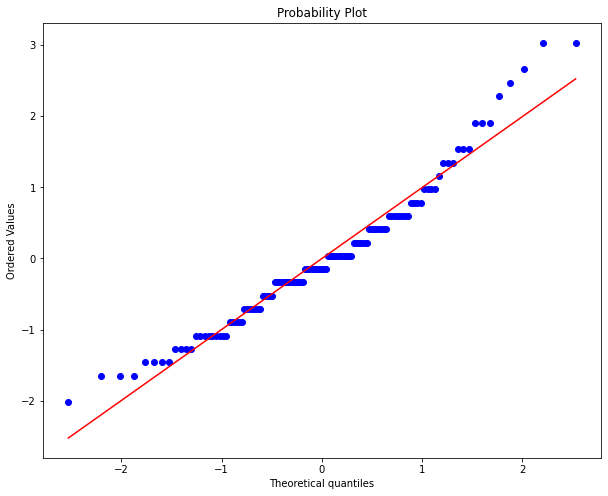

Variance in G3 for Pstatus between two groups (A, T) is same in population

Difference in G3 for Pstatus between two group (A, T) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  121.0  11.669421  3.617984  0.328908  11.018207  12.320636
1        G3  121.0  10.867769  4.279685  0.389062  10.097452  11.638085
2  combined  242.0  11.268595  3.974786  0.255509  10.765279  11.771911
          Independent t-test   results
0    Difference (G3 - G3) =     0.8017
1      Degrees of freedom =   240.0000
2                       t =     1.5735
3   Two side test p value =     0.1169
4  Difference < 0 p value =     0.9415
5  Difference > 0 p value =     0.0585
6               Cohen's d =     0.2023
7               Hedge's g =     0.2017
8           Glass's delta =     0.2216
9             Pearson's r =     0.1011
There is not enough evidence suggested that the average G3 score for Pstatus is different between group A and T

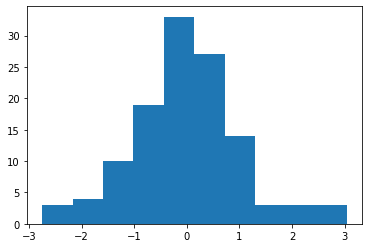

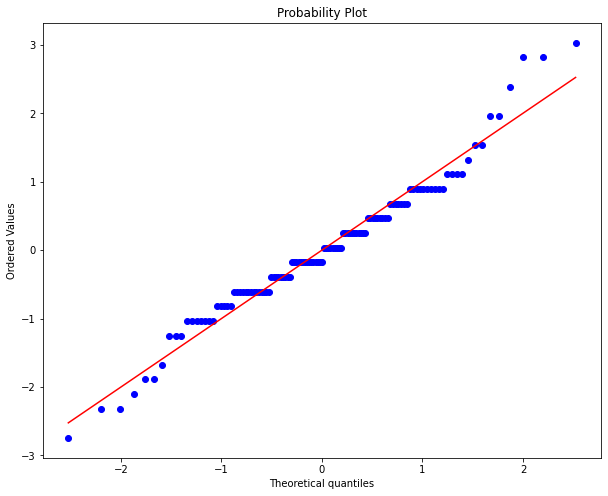

Variance in G3 for schoolsup between two groups (yes, no) is not same in population

Difference in G3 for schoolsup between two group (yes, no) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  119.0  10.487395  2.708635  0.248300   9.995693  10.979097
1        G3  119.0  11.655462  3.564032  0.326714  11.008479  12.302445
2  combined  238.0  11.071429  3.212440  0.208232  10.661207  11.481650
              Welch's t-test   results
0    Difference (G3 - G3) =    -1.1681
1      Degrees of freedom =   221.9444
2                       t =    -2.8464
3   Two side test p value =     0.0048
4  Difference < 0 p value =     0.0024
5  Difference > 0 p value =     0.9976
6               Cohen's d =    -0.3690
7               Hedge's g =    -0.3678
8           Glass's delta =    -0.4312
9             Pearson's r =     0.1877
We can conclude that average G3 score for schoolsup between two group yes and no is different


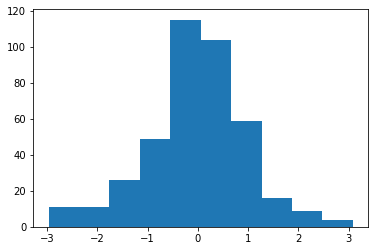

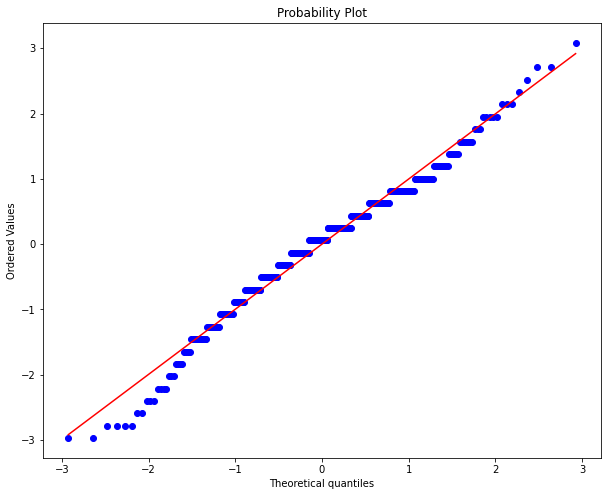

Variance in G3 for famsup between two groups (no, yes) is same in population

Difference in G3 for famsup between two group (no, yes) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  404.0  11.277228  4.050228  0.201506  10.881093  11.673363
1        G3  404.0  11.584158  3.552561  0.176747  11.236698  11.931619
2  combined  808.0  11.430693  3.810264  0.134045  11.167576  11.693810
          Independent t-test   results
0    Difference (G3 - G3) =    -0.3069
1      Degrees of freedom =   806.0000
2                       t =    -1.1451
3   Two side test p value =     0.2525
4  Difference < 0 p value =     0.1263
5  Difference > 0 p value =     0.8737
6               Cohen's d =    -0.0806
7               Hedge's g =    -0.0805
8           Glass's delta =    -0.0758
9             Pearson's r =     0.0403
There is not enough evidence suggested that the average G3 score for famsup is different between group no a

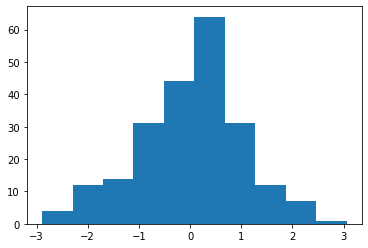

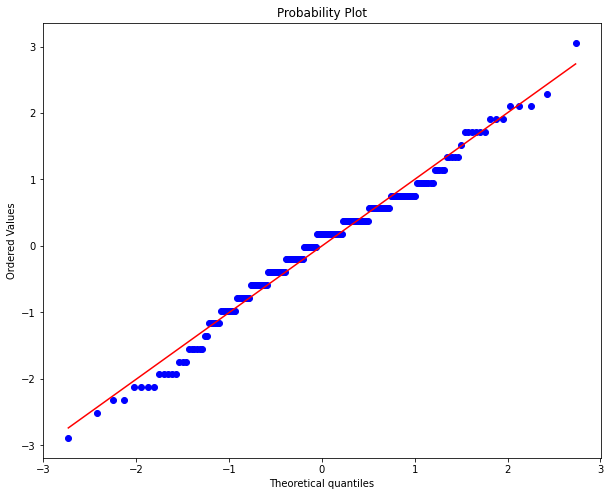

Variance in G3 for paid between two groups (no, yes) is same in population

Difference in G3 for paid between two group (no, yes) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  220.0  11.036364  3.742700  0.252333  10.539052  11.533675
1        G3  220.0  10.972727  3.637599  0.245247  10.489381  11.456073
2  combined  440.0  11.004545  3.686456  0.175745  10.659140  11.349951
          Independent t-test   results
0    Difference (G3 - G3) =     0.0636
1      Degrees of freedom =   438.0000
2                       t =     0.1808
3   Two side test p value =     0.8566
4  Difference < 0 p value =     0.5717
5  Difference > 0 p value =     0.4283
6               Cohen's d =     0.0172
7               Hedge's g =     0.0172
8           Glass's delta =     0.0170
9             Pearson's r =     0.0086
There is not enough evidence suggested that the average G3 score for paid is different between group no and yes

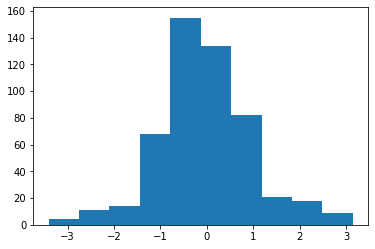

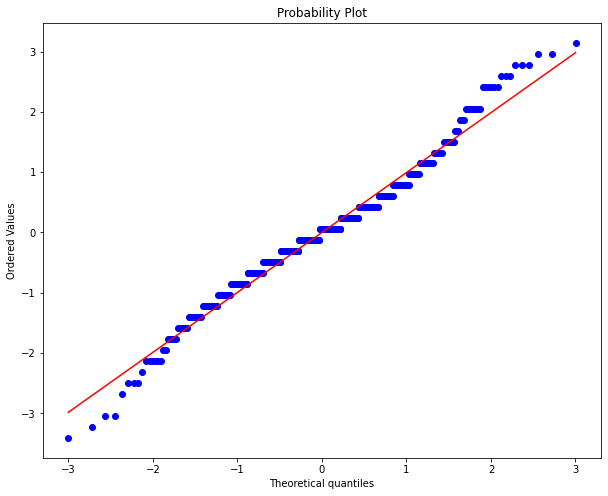

Variance in G3 for activities between two groups (no, yes) is same in population

Difference in G3 for activities between two group (no, yes) is not normaly distributed in population

   Variable       N       Mean        SD        SE  95% Conf.   Interval
0        G3   516.0  11.193798  3.811230  0.167780  10.864181  11.523416
1        G3   516.0  11.474806  3.930136  0.173015  11.134905  11.814707
2  combined  1032.0  11.334302  3.871814  0.120524  11.097801  11.570803
          Independent t-test    results
0    Difference (G3 - G3) =     -0.2810
1      Degrees of freedom =   1030.0000
2                       t =     -1.1660
3   Two side test p value =      0.2439
4  Difference < 0 p value =      0.1219
5  Difference > 0 p value =      0.8781
6               Cohen's d =     -0.0726
7               Hedge's g =     -0.0725
8           Glass's delta =     -0.0737
9             Pearson's r =      0.0363
There is not enough evidence suggested that the average G3 score for activities is d

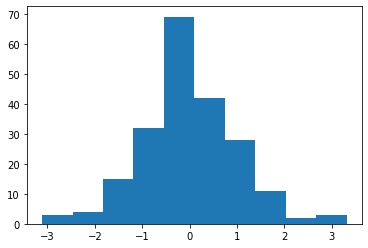

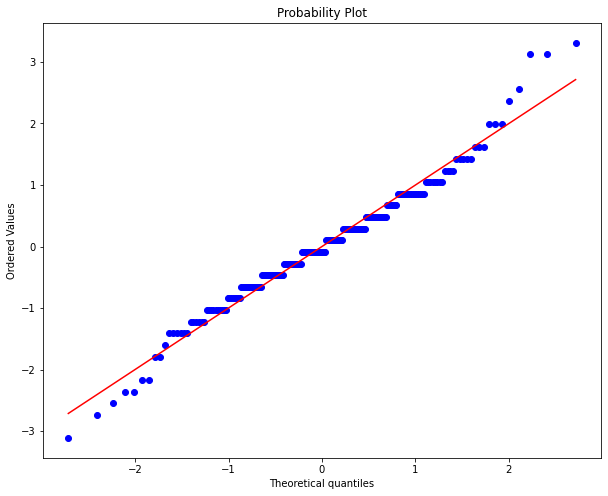

Variance in G3 for nursery between two groups (yes, no) is same in population

Difference in G3 for nursery between two group (yes, no) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  209.0  11.502392  4.052687  0.280330  10.949740  12.055045
1        G3  209.0  11.033493  3.776678  0.261238  10.518479  11.548507
2  combined  418.0  11.267943  3.919450  0.191707  10.891111  11.644774
          Independent t-test   results
0    Difference (G3 - G3) =     0.4689
1      Degrees of freedom =   416.0000
2                       t =     1.2237
3   Two side test p value =     0.2218
4  Difference < 0 p value =     0.8891
5  Difference > 0 p value =     0.1109
6               Cohen's d =     0.1197
7               Hedge's g =     0.1195
8           Glass's delta =     0.1157
9             Pearson's r =     0.0599
There is not enough evidence suggested that the average G3 score for nursery is different between group y

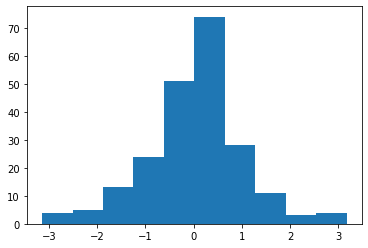

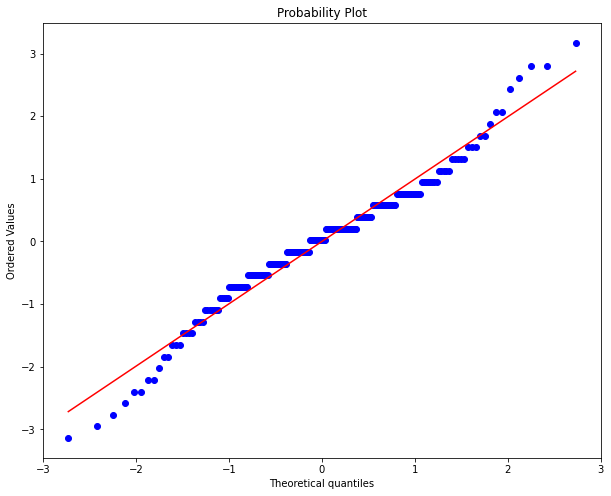

Variance in G3 for internet between two groups (no, yes) is same in population

Difference in G3 for internet between two group (no, yes) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  217.0  10.534562  3.855006  0.261695  10.018760  11.050365
1        G3  217.0  11.626728  3.688549  0.250395  11.133198  12.120259
2  combined  434.0  11.080645  3.807789  0.182780  10.721399  11.439891
          Independent t-test   results
0    Difference (G3 - G3) =    -1.0922
1      Degrees of freedom =   432.0000
2                       t =    -3.0154
3   Two side test p value =     0.0027
4  Difference < 0 p value =     0.0014
5  Difference > 0 p value =     0.9986
6               Cohen's d =    -0.2895
7               Hedge's g =    -0.2890
8           Glass's delta =    -0.2833
9             Pearson's r =     0.1436
We can conclude that average G3 score for internet between two group no and yes is different


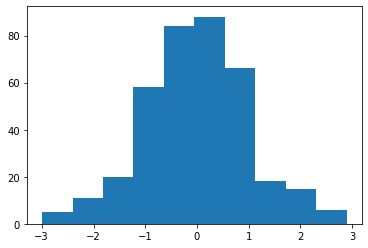

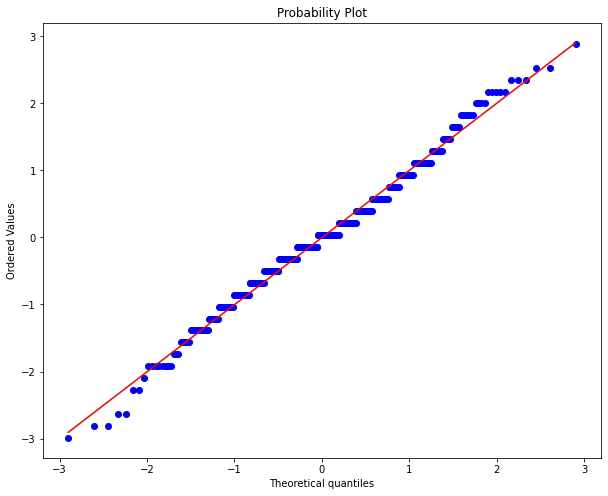

Variance in G3 for romantic between two groups (no, yes) is same in population

Difference in G3 for romantic between two group (no, yes) is not normaly distributed in population

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0        G3  371.0  11.617251  3.719071  0.193085  11.237570  11.996931
1        G3  371.0  10.830189  4.168836  0.216435  10.404591  11.255786
2  combined  742.0  11.223720  3.967286  0.145644  10.937796  11.509643
          Independent t-test   results
0    Difference (G3 - G3) =     0.7871
1      Degrees of freedom =   740.0000
2                       t =     2.7136
3   Two side test p value =     0.0068
4  Difference < 0 p value =     0.9966
5  Difference > 0 p value =     0.0034
6               Cohen's d =     0.1992
7               Hedge's g =     0.1990
8           Glass's delta =     0.2116
9             Pearson's r =     0.0993
We can conclude that average G3 score for romantic between two group no and yes is different


In [11]:
indepentend_ttest = ['higher','school','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery',
                    'internet','romantic']

for col in indepentend_ttest:
    value = one_sample_t_test(stats_df,col)
    value.index = [col]
    result = result.append(value)

In [12]:
result

Levene test Pvalue  Shapiro test Pvalue  T test Pvalue
sex                   0.728956             0.000340         0.2000
higher                0.204543             0.007103         0.0000
school                0.796980             0.000062         0.0010
address               0.507321             0.005874         0.0003
famsize               0.177048             0.000113         0.2283
Pstatus               0.230327             0.001206         0.1169
schoolsup             0.024502             0.009791         0.0048
famsup                0.171592             0.000046         0.2525
paid                  0.769727             0.018727         0.8566
activities            0.541855             0.000001         0.2439
nursery               0.189493             0.003576         0.2218
internet              0.490233             0.000391         0.0027
romantic              0.176539             0.016924         0.0068

In [13]:
encoder = OrdinalEncoder()
df[object_cols] = encoder.fit_transform(df[object_cols])
for i in range(len(object_cols)):
    print(object_cols[i],df[object_cols[i]].unique())
print()
for i in object_cols:
    print(i,stats_df[i].unique())

school [0. 1.]
sex [0. 1.]
address [1. 0.]
famsize [0. 1.]
Pstatus [0. 1.]
Mjob [0. 1. 2. 3. 4.]
Fjob [4. 2. 3. 1. 0.]
reason [0. 2. 1. 3.]
guardian [1. 0. 2.]
schoolsup [1. 0.]
famsup [0. 1.]
paid [0. 1.]
activities [0. 1.]
nursery [1. 0.]
higher [1. 0.]
internet [0. 1.]
romantic [0. 1.]

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [14]:
x = df.drop('G3',axis=1)
y = df['G3']

In [15]:
def fit_model(x,y):
    model = RandomForestRegressor(random_state=1)
    model.fit(x,y)
    return model


def calculate_metrics(model,xtest,ytest):
    pred = model.predict(xtest)
    mae = mean_absolute_error(ytest,pred)
    mse = mean_squared_error(ytest,pred)
    r2 = r2_score(ytest,pred)
    evs = explained_variance_score(ytest,pred)
    
    return r2,mae,mse,evs

def train_get_metircs(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = fit_model(xtrain_scaled,ytrain)
    r2,mae,mse,evs = calculate_metrics(model,xtest_scaled,ytest)
    return r2,mae,mse,evs


def evluation(x,y):
    r2,mae,mse,evs = train_get_metircs(x,y)
    display = pd.DataFrame([[r2,mae,mse,evs,x.shape[1]]],columns=['Accuracy','Mean Obsulute Error','Mean Squared Error','Explained Variance Score','Feature Count'])
    return display

In [16]:
eval_df = evluation(x,y)
eval_df.index = ['All Features']
results = eval_df

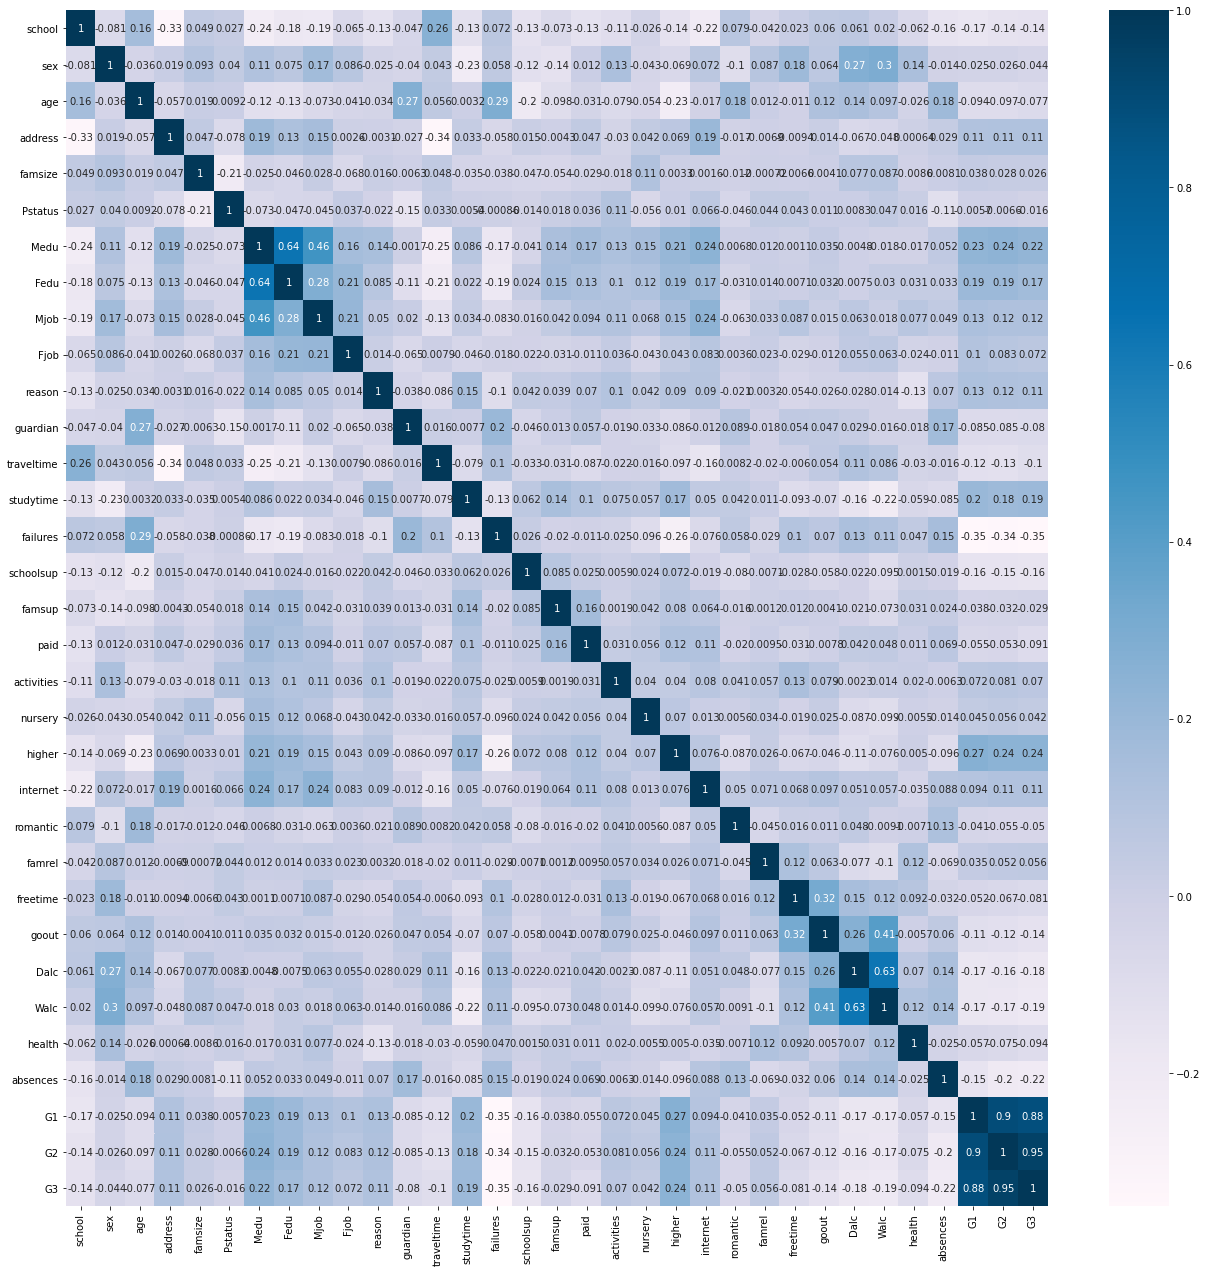

['school', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'higher', 'internet', 'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2']


In [17]:
# feature selection - filter method
plt.figure(figsize=(22,22))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

cor_target = abs(cor['G3'])
relevent_features = cor_target[cor_target>0.1]
names = [index for index,value in relevent_features.iteritems()]
names.remove('G3')
print(names)

# evaluate model with new features
strong_features = evluation(x[names],y)
strong_features.index = ['Strong Features']
results = results.append(strong_features)

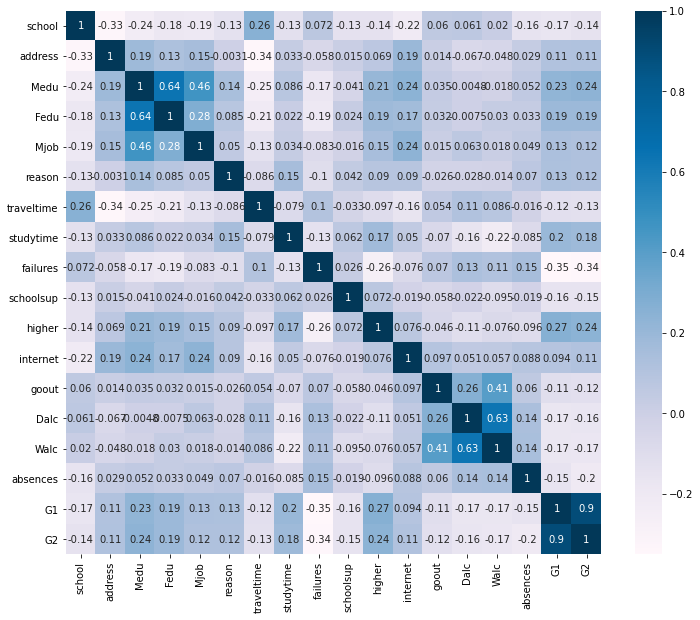

In [18]:
plt.figure(figsize=(12,10))
new_cor = df[names].corr()
sns.heatmap(new_cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [19]:
# Univariate Selection
def univariate_selection(k):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    selector = SelectKBest(f_regression,k=k)
    xnew = selector.fit_transform(xtrain_scaled,ytrain)
    idx = selector.get_support()
    for name, inc in zip(df.drop('G3',axis=1).columns,idx):
        print(name,inc)
    feature_names = df.drop('G3',axis=1).columns[idx]
    return feature_names

In [20]:
feature_names = univariate_selection(20)
univariate_features = evluation(x[feature_names],y)
univariate_features.index = ['Univariate f-test']
results = results.append(univariate_features)
results.head()

school True
sex False
age False
address True
famsize False
Pstatus False
Medu True
Fedu True
Mjob True
Fjob False
reason True
guardian True
traveltime True
studytime True
failures True
schoolsup True
famsup False
paid True
activities False
nursery False
higher True
internet True
romantic False
famrel False
freetime False
goout True
Dalc True
Walc True
health False
absences True
G1 True
G2 True


Accuracy  Mean Obsulute Error  Mean Squared Error  \
All Features       0.919623             0.638788            0.664459   
Strong Features    0.907206             0.662475            0.767108   
Univariate f-test  0.912255             0.650253            0.725368   

                   Explained Variance Score  Feature Count  
All Features                       0.920069             32  
Strong Features                    0.907783             18  
Univariate f-test                  0.912649             20

In [21]:
# recursive feature elimation
def run_rfe():
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = RandomForestRegressor(random_state=1)
    rfe = RFE(model)
    rfe = rfe.fit(xtrain_scaled,ytrain)
    feature_names = df.drop('G3',axis=1).columns[rfe.get_support()]
    return feature_names

In [22]:
rfe_names = run_rfe()
print(rfe_names)
rfe_names = evluation(x[rfe_names],y)
rfe_names.index = ['RFE']
results = results.append(rfe_names)
results.head()

Index(['age', 'Medu', 'Fedu', 'Fjob', 'guardian', 'traveltime', 'studytime',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2'],
      dtype='object')


Accuracy  Mean Obsulute Error  Mean Squared Error  \
All Features       0.919623             0.638788            0.664459   
Strong Features    0.907206             0.662475            0.767108   
Univariate f-test  0.912255             0.650253            0.725368   
RFE                0.919633             0.631010            0.664379   

                   Explained Variance Score  Feature Count  
All Features                       0.920069             32  
Strong Features                    0.907783             18  
Univariate f-test                  0.912649             20  
RFE                                0.920033             16

In [23]:
# Embedded method - feature importance tree based
def feature_importance():
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = RandomForestRegressor(random_state=1)
    model.fit(xtrain_scaled,ytrain)
    plt.figure(figsize=(10,12))
    feature_importances = pd.Series(model.feature_importances_,index=xtrain.columns)
    feature_importances.sort_values(ascending=True).plot(kind='barh')
    plt.show()
    
    return model

def select_feature_from_model(model):
    model = SelectFromModel(model,prefit=True,threshold=0.01)
    idx = model.get_support()
    feature_names = df.drop('G3',axis=1).columns[idx]
    return feature_names

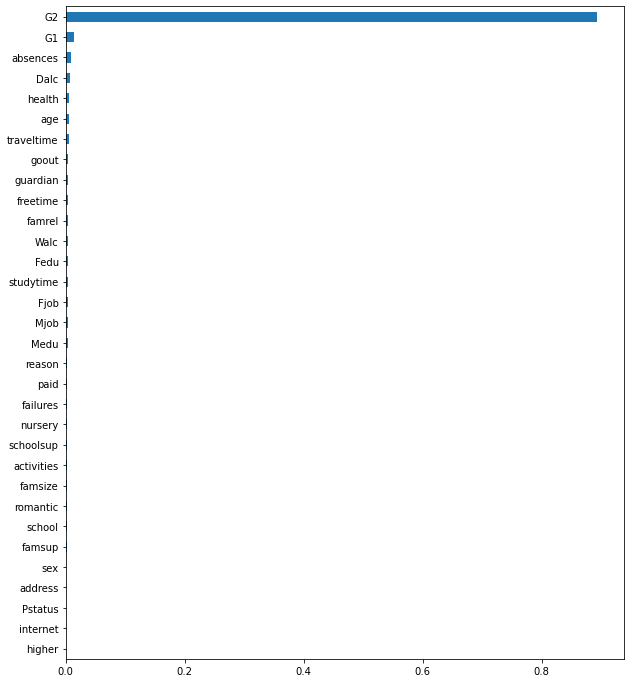

Index(['G1', 'G2'], dtype='object')


Accuracy  Mean Obsulute Error  Mean Squared Error  \
Strong Features     0.907206             0.662475            0.767108   
Univariate f-test   0.912255             0.650253            0.725368   
Feature_Importance  0.912781             0.662002            0.721021   
All Features        0.919623             0.638788            0.664459   
RFE                 0.919633             0.631010            0.664379   

                    Explained Variance Score  Feature Count  
Strong Features                     0.907783             18  
Univariate f-test                   0.912649             20  
Feature_Importance                  0.913157              2  
All Features                        0.920069             32  
RFE                                 0.920033             16

In [24]:
model = feature_importance()
feature_names = select_feature_from_model(model)
print(feature_names)
feature_importance = evluation(x[feature_names],y)
feature_importance.index = ['Feature_Importance']
results = results.append(feature_importance).sort_values('Accuracy')
results.head()

In [25]:
rfe = ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
removed_cols = []
for i in df.columns:
    if i not in rfe:
        removed_cols.append(i)
print('Feature selected based on corr: \n',rfe)
rfe.insert(-1,'G3')
rfe.insert(-1,'romantic')
print('added features according to t test pvalue: \n',rfe)

Feature selected based on corr: 
 ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
added features according to t test pvalue: 
 ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G3', 'romantic', 'G2']


In [27]:
exp_reg102 = setup(data = df[rfe], 
                  target = 'G3',
                  train_size=0.9,
                  feature_selection =False,
                  numeric_features = ['age','G1','G2','absences'],
                  categorical_features = ['Medu','Fedu','Mjob','Fjob','reason','traveltime','famrel','freetime','goout',
                                         'Dalc','Walc','health','romantic'],
                  profile=True,
                  transformation=False,
                  log_experiment = True,
                  remove_outliers=True,
                  experiment_name = 'student')

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
top = compare_models(n_select = 3)
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True

In [29]:
omp = create_model('omp')
tuned_omp = tune_model(model)

In [30]:
rf = create_model('huber')
tuned_rf = tune_model(rf)

In [31]:
gbr = create_model('ridge')
tuned_gbr = tune_model(gbr)

In [32]:
br = create_model('br')
tuned_br = tune_model(br)

In [33]:
rf = create_model('rf')
tuned_rf = tune_model(rf)

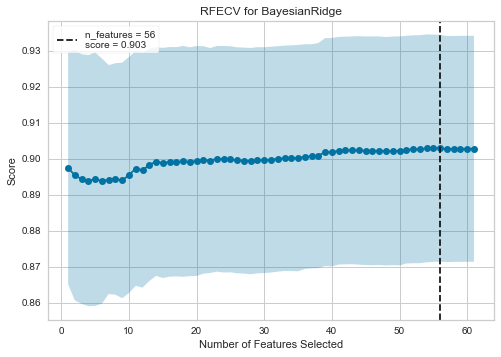

In [34]:
plot_model(tuned_br,plot='rfe')

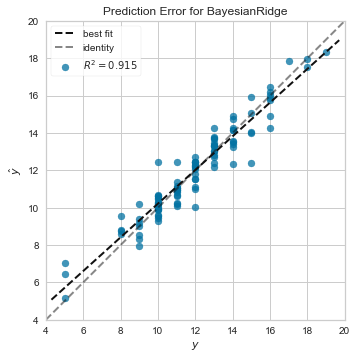

In [35]:
plot_model(tuned_br,plot='error')

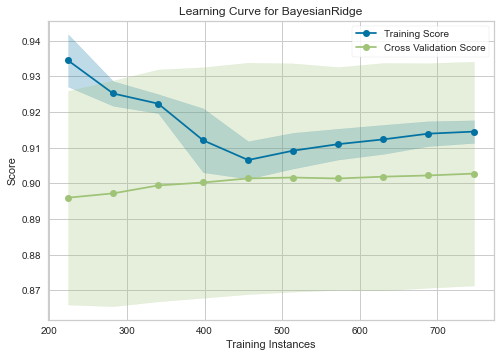

In [36]:
plot_model(tuned_br,plot='learning')

In [37]:
stats_df[names].to_csv('selected_features_student_performance.csv',index=False)